# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

date = time.strftime("%m/%d/%Y")

Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

SyntaxError: invalid syntax (<ipython-input-92-5620c333b8ef>, line 10)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# test_url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vostok"
# print(test_url)

In [ ]:
# URL for calling data from openwathermap
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

# Create city data list where it will hold weather data for each city
city_data = []

# Print header for output
print("Beginning Data Retrieval")
print("------------------------")

# Set up counter to count sequence for each record
counter = 1

# Loop through each city in the city list ( = cities[])
for city in cities:
   
    city_url = url + city
     
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

        # Run API request with try and except test to see if where is any city's data is missing
    try:
        
        # city_weather will get data in json
        city_weather = requests.get(city_url).json()
        
        # Parse data into variables for city_data dataframe
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Create dictionary to hold variables above
        city_data.append({"City": city,
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind                         
                         })
   

    except:
        print(f"City not found. Skipping...")
        pass
    
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# json to df
city_data_df = pd.DataFrame(city_data)

# columns from df 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


city_data_df.count()


In [ ]:
# Output File (CSV)
output_data_file = city_data_df.to_csv("cities_data.csv", index=False)

In [ ]:
# read_data = pd.read_csv("cities_data.csv")
# read_data.head()

In [ ]:
# Display the City Data Frame
city_data_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

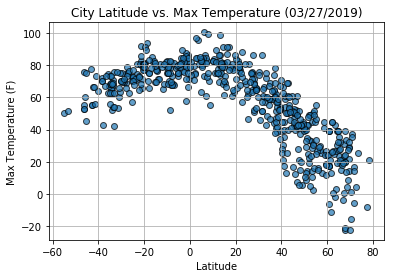

In [93]:
# Bulid scatter plot for latitue vs temperature

date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors="black",alpha=0.7)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("temperature.png")

In [94]:
# 

#### Latitude vs. Humidity Plot

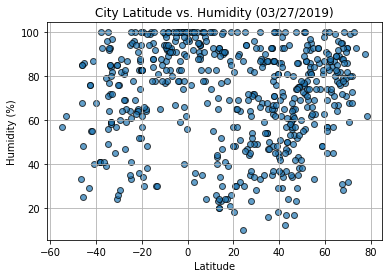

In [95]:
# Scatter plot : Latitude vs. Humidity

date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors="black",alpha=0.7)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

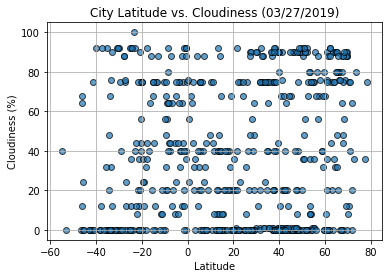

In [96]:
# Scatter plot : Latitude vs. Cloudiness

date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors="black",alpha=0.7)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

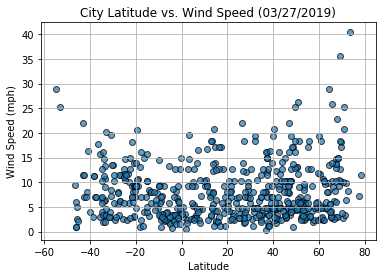

In [97]:
# Scatter plot : Latitude vs. Wind Speed 

date = time.strftime("%m/%d/%Y")

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors="black",alpha=0.7)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("wind.png")